## 1. MULTIPLE LINEAR REG - intro

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


Predict the prices of homes using the continuous variables in our dataset.
- For now lets only focus on the continous variables

`GOAL1`: Using Statsmodels, fit 3 individual simple linear regression models to predict price. You should have the following models
- One that uses area
- another that uses bedrooms
- a final one using bathrooms

`Goal2`: Use multiple linear regression model to predict price, using area, bedrooms and bathrooms


In [11]:
# define our intercept
df['intercepts'] = 1

### Goal 1
#### Model 1: using area to predict price

In [12]:
lm = sm.OLS(df['price'], df[['intercepts','area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Sun, 09 May 2021   Prob (F-statistic):               0.00
Time:                        17:12:48   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercepts  9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 2: using bedrooms to predict price

In [13]:
lm = sm.OLS(df['price'], df[['intercepts','bedrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     7446.
Date:                Sun, 09 May 2021   Prob (F-statistic):               0.00
Time:                        17:13:39   Log-Likelihood:                -85509.
No. Observations:                6028   AIC:                         1.710e+05
Df Residuals:                    6026   BIC:                         1.710e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercepts -9.485e+04   1.08e+04     -8.762      0.000   -1.16e+05   -7.36e+04
bedrooms    2.284e+05   2646.744     86.289      0.000    2.23e+05    2.34e+05
==============================================================================
Omnibus:                      967.118   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1599.431
Skew:                           1.074   Prob(JB):                         0.00
Kurtosis:                       4.325   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## NOTE: 
- Individually, all three variables above are seen as significant linear predictors of house prices
- Notice: the sum of the Rsquared values > 1. How is this possible? This is because our explanatory variables are not independent of one another.

#### Model 3: using bathrooms to predict house price

In [14]:
lm = sm.OLS(df['price'], df[['intercepts','bathrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     7116.
Date:                Sun, 09 May 2021   Prob (F-statistic):               0.00
Time:                        17:14:39   Log-Likelihood:                -85583.
No. Observations:                6028   AIC:                         1.712e+05
Df Residuals:                    6026   BIC:                         1.712e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercepts  4.314e+04   9587.189      4.500      0.000    2.43e+04    6.19e+04
bathrooms   3.295e+05   3905.540     84.358      0.000    3.22e+05    3.37e+05
==============================================================================
Omnibus:                      915.429   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1537.531
Skew:                           1.010   Prob(JB):                         0.00
Kurtosis:                       4.428   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### GOAL 2: Predict price using all continuous variables

In [15]:
lm = sm.OLS(df['price'],df[['intercepts','area','bedrooms','bathrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Sun, 09 May 2021   Prob (F-statistic):               0.00
Time:                        17:17:29   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercepts  1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## NOTICE
- Only area is statistically significant. This is due to multicollinearity

### 2. DUMMY VARIABLES - use and interpretation

In [39]:
df = pd.read_csv('./house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


**2.1 GOAL**: Use the pd.get_dummies documentation to assist you with obtaining dummy variables for the **neighborhood** column. Then use join to add the dummy variables to your dataframe, df, and store the joined results in **df_new**.

Fit a linear model using **all three levels** of **neighborhood** to predict the price. 

Don't forget:
- the get_dummies() method always orders the resulting dummy fields in alpha numeric order
- add an intercept.

In [19]:
df.neighborhood.value_counts()

B    2427
A    1876
C    1725
Name: neighborhood, dtype: int64

In [41]:
df[['neig_a', 'neig_b', 'neig_c']] = pd.get_dummies(df['neighborhood'])
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,neig_a,neig_b,neig_c
0,1112,B,1188,3,2,ranch,598291,0,1,0
1,491,B,3512,5,3,victorian,1744259,0,1,0
2,5952,B,1134,3,2,ranch,571669,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,0,0
4,5108,B,2208,6,4,victorian,1101539,0,1,0


In [30]:
# define intercept
df_new['intercept'] = 1

# instantiate and fit model
lm = sm.OLS(df['price'],df[['intercept','neig_a', 'neig_b', 'neig_c']])
results = lm.fit()
# display result summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     655.0
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        09:47:33   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6024   BIC:                         1.742e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -7.01e+17   8.86e+17     -0.792      0.429   -2.44e+18    1.04e+18
neig_a       7.01e+17   8.86e+17      0.792      0.429   -1.04e+18    2.44e+18
neig_b       7.01e+17   8.86e+17      0.792      0.429   -1.04e+18    2.44e+18
neig_c       7.01e+17   8.86e+17      0.792      0.429   -1.04e+18    2.44e+18
==============================================================================
Omnibus:                      682.618   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1140.081
Skew:                           0.788   Prob(JB):                    2.72e-248
Kurtosis:                       4.435   Cond. No.                     3.50e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.59e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### INTERPRETATION - confidence interval red flag
Notice the confidence intervals for the intercepts and all dummy variables is a range from an extremely large negative number to an extremely lare positive number. This isnt helpful. This is an indication that you did not create an X matrix that is full rank (i.e when you do not drop one of the dummy variable columns for a categorical variable)

**2.2 GOAL:** fit an appropriate linear model for using neighborhood to predict the price of a home. Use neighborhood A as your baseline. (And remember that the values shown in the results for the other neighborhoods will be based on comparisons with this baseline neighborhood A) 

In [32]:
lm = sm.OLS(df['price'],df[['intercept','neig_b', 'neig_c']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        09:56:29   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.411e+05   1.05e+04     51.537      0.000    5.21e+05    5.62e+05
neig_b      5.295e+05    1.4e+04     37.870      0.000    5.02e+05    5.57e+05
neig_c      -332.3594   1.52e+04     -0.022      0.983   -3.01e+04    2.94e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                         3.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### INTERPRETATION
(1) Each of these coefficients is a comparison of the category to the baseline. Therefore a positive coefficient suggest the neigborhood is more expensive on average than the baseline. Alternatively, a negative coefficient suggest that the neigborhood is less expensive on average than the baseline

(2) On average, B is the most expensive neighborhood, followed by A, while C is the least expensive

(3) You can look at the p-values to compare to neighorhood A.

(4) How do you compare neighborhood B to C? By comparing confidence intervals for B and C. If they dont overlap, ==> we have confidence that they differ

(5) There is statistcally significant evidence that the average home price in neigborhood B differs from the average home price in neigborhood A.

(6) There is statistically significant evidence that the average home price in neigborhood B differs from the average home price in neigborhood C


In [36]:
# can a summary of price by neighborhood confirm this?
df.groupby('neighborhood')['price'].mean()/100  #only dividing by 100 to remove the exponentiation

neighborhood
A     5411.322985
B    10705.896321
C     5407.999391
Name: price, dtype: float64

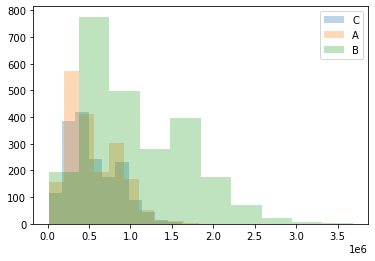

In [38]:
plt.hist(df.query("neig_c == 1")['price'], alpha = 0.3, label = 'C');
plt.hist(df.query("neig_a == 1")['price'], alpha = 0.3, label = 'A');
plt.hist(df.query("neig_b == 1")['price'], alpha = 0.3, label = 'B');
plt.legend();

**3 Goal :** add dummy variables for the style of house. Create a new linear model using these new dummies, as well as the previous neighborhood dummies. Use ranch as the baseline for the style. Additionally, add bathrooms and bedrooms to your linear model. 

In [42]:
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,neig_a,neig_b,neig_c
0,1112,B,1188,3,2,ranch,598291,0,1,0
1,491,B,3512,5,3,victorian,1744259,0,1,0
2,5952,B,1134,3,2,ranch,571669,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,0,0
4,5108,B,2208,6,4,victorian,1101539,0,1,0


In [46]:
df['style'].value_counts()

victorian    2997
ranch        1802
lodge        1229
Name: style, dtype: int64

In [48]:
# since get_dummies() sorts categories in alphabetical order, i can confidently assign values
df[['is_lodge','is_ranch','is_victorian']] = pd.get_dummies(df['style'])
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,neig_a,neig_b,neig_c,is_lodge,is_ranch,is_victorian
0,1112,B,1188,3,2,ranch,598291,0,1,0,0,1,0
1,491,B,3512,5,3,victorian,1744259,0,1,0,0,0,1
2,5952,B,1134,3,2,ranch,571669,0,1,0,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,0,0,0,1,0
4,5108,B,2208,6,4,victorian,1101539,0,1,0,0,0,1


In [52]:
df['intercept'] = 1

lm = sm.OLS(df['price'], df[['intercept','is_lodge','is_victorian','bathrooms','bedrooms','neig_b', 'neig_c']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4250.
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        10:25:47   Log-Likelihood:                -82944.
No. Observations:                6028   AIC:                         1.659e+05
Df Residuals:                    6021   BIC:                         1.659e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept    -3.833e+05    1.2e+04    -31.995      0.000   -4.07e+05    -3.6e+05
is_lodge      1.685e+05   9906.629     17.012      0.000    1.49e+05    1.88e+05
is_victorian  7.056e+04   8337.790      8.463      0.000    5.42e+04    8.69e+04
bathrooms     9.996e+04   1.09e+04      9.164      0.000    7.86e+04    1.21e+05
bedrooms      1.732e+05   7677.152     22.558      0.000    1.58e+05    1.88e+05
neig_b        5.229e+05   7040.928     74.271      0.000    5.09e+05    5.37e+05
neig_c       -7168.6285   7639.254     -0.938      0.348   -2.21e+04    7807.045
==============================================================================
Omnibus:                      978.611   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2926.472
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                       5.962   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### INTERPRETATIONS:
(1) 80.9% of the variability in price can be explained by the linear model built using bedrooms, bathrooms, neighborhood, and home style

(2) For every additional bedroom a home has we can expect the price to increase by 173200, holding all other variables constant

(3) For every additional bathroom a home has we can expect the price to increase by 99960, holding all other variables constant

(4) We expect that a victorian house will cost 70560 more than a ranch house, all else being equal

(5) We expect that a house in neighborhood C will cost 7168 less than a neighborhood A house, all else being equal.